<a href="https://colab.research.google.com/github/yulingchen628/10901ML/blob/main/ML_HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/content/drive/My Drive/bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
data['education'].unique()
data['contact'].unique()
data['job'].unique()
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [8]:
data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital'])
data['education'] = le.fit_transform(data['education'])
data['default'] = le.fit_transform(data['default'])
data['housing'] = le.fit_transform(data['housing'])
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact'])
data['month'] = le.fit_transform(data['month'])
data['poutcome'] = le.fit_transform(data['poutcome'])
data['y'] = le.fit_transform(data['y'])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [53]:
ss = StandardScaler()

In [54]:
scaled_data = ss.fit_transform(data)
scaled_data

array([[ 1.60696496, -0.10381968, -0.27576178, ..., -0.25194037,
         0.44489814, -0.36398261],
       [ 0.28852927,  1.42400783,  1.3683719 , ..., -0.25194037,
         0.44489814, -0.36398261],
       [-0.74738448, -0.71495069, -0.27576178, ..., -0.25194037,
         0.44489814, -0.36398261],
       ...,
       [ 2.92540065,  0.20174582, -0.27576178, ...,  1.05047333,
        -0.56617504,  2.74738398],
       [ 1.51279098, -1.02051619, -0.27576178, ..., -0.25194037,
         0.44489814, -0.36398261],
       [-0.37068857, -0.71495069, -0.27576178, ...,  4.52357654,
        -1.57724822, -0.36398261]])

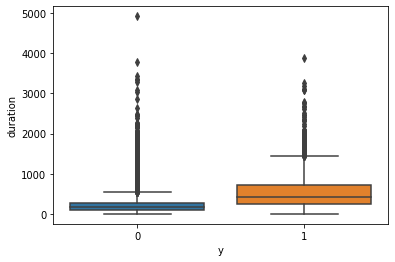

In [55]:
sns.boxplot(x='y', y='duration', data=data)

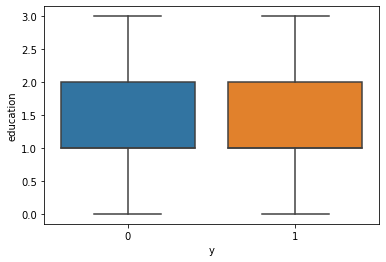

In [56]:
sns.boxplot(x='y', y='education', data=data)

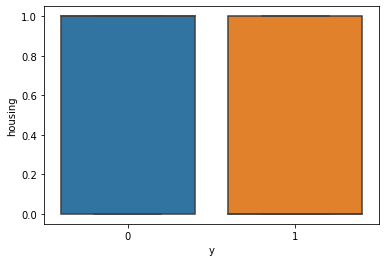

In [57]:
sns.boxplot(x='y', y='housing', data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


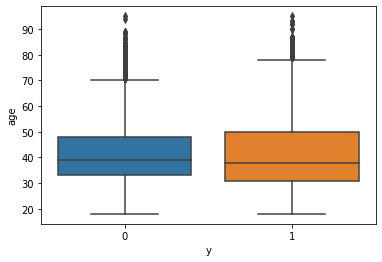

In [58]:
sns.boxplot(data['y'],data['age'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


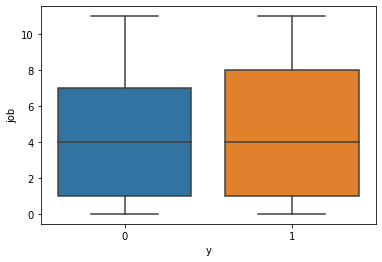

In [59]:
sns.boxplot(data['y'],data['job'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


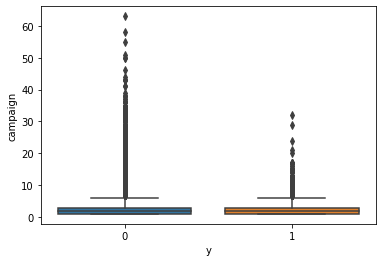

In [60]:
sns.boxplot(data['y'],data['campaign'])

方法一: Linear regression


In [61]:
X = data[['age','job','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']]
Y = data['y'].values

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [63]:
lr = LinearRegression()  
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
lr.score(X_train, Y_train)

0.21294146915798162

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
score = cross_val_score(lr,X,Y,cv=10,scoring='neg_mean_squared_error')

In [67]:
score.mean()

-0.09136866467511386

In [68]:
score.std()

0.09039077729846555

In [69]:
cross_val_score(lr,X,Y,cv=10,scoring='r2')

array([ 0.06244463,  0.19060186,  0.12668761,  0.21647211,  0.09006586,
       -0.04635113,  0.00243581,  0.11868561,  0.14435068, -0.39750388])

方法二 : Ridge

In [70]:
from sklearn.linear_model import Ridge

In [71]:
rg = Ridge(alpha=0.001,normalize=True)

In [72]:
rg_score = cross_val_score(rg,X_test,Y_test,cv=7,scoring='r2')
rg_score

array([0.19437071, 0.2131294 , 0.20934367, 0.20217382, 0.19967491,
       0.21292556, 0.15535934])

In [73]:
rg_score.mean()

0.19813963134589657

In [74]:
from sklearn.linear_model import RidgeCV

In [75]:
rgcv = RidgeCV(alphas=(1.0,0.1,0.01,0.005,0.0025,0.001,0.00025),normalize=True)

In [76]:
rgcv.fit(X_train,Y_train)

RidgeCV(alphas=array([1.0e+00, 1.0e-01, 1.0e-02, 5.0e-03, 2.5e-03, 1.0e-03, 2.5e-04]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring=None, store_cv_values=False)

In [77]:
rgcv.score(X_train,Y_train)

0.21290619964720725

方法三 : Lasso

In [78]:
from sklearn.linear_model import LassoCV

In [79]:
lscv = LassoCV(alphas=(1.0,0.1,0.01,0.005,0.0025,0.001,0.00025),normalize=True)

In [80]:
lscv.fit(X_test,Y_test)

LassoCV(alphas=(1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025), copy_X=True,
        cv=None, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
        n_jobs=None, normalize=True, positive=False, precompute='auto',
        random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [81]:
lscv.score(X_train,Y_train)

0.17936453863643242

方法四 : ElasticNet

In [82]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [83]:
en = ElasticNet(alpha=0.001,l1_ratio=0.8,normalize=True)

In [84]:
en_score = cross_val_score(en,X_test,Y_test,cv=7,scoring='r2')

In [85]:
encv = ElasticNetCV(alphas=(0.1,0.01,0.005,0.0025,0.001),l1_ratio=(0.1,0.25,0.5,0.75,0.8),normalize=True)

In [86]:
encv.fit(X_train,Y_train)

ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.0025, 0.001), copy_X=True, cv=None,
             eps=0.001, fit_intercept=True,
             l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8), max_iter=1000, n_alphas=100,
             n_jobs=None, normalize=True, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [87]:
encv.score(X_train,Y_train)

0.009901905955989387

方法五 : Polynomial

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
pf = PolynomialFeatures(degree=2)

In [90]:
xp = pf.fit_transform(X)

In [91]:
lr.fit(xp,Y)
lr.score(xp,Y)

0.28301431653419773